# Analise de Sentimento

Analise de sentimento para as resenhas de filmes do imdb em pt br

## Leitura de Dados

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')

from nltk import tokenize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gstankev\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [2]:
imdb = pd.read_csv('imdb-reviews-pt-br.csv')

In [3]:
imdb.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [4]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49459 entries, 0 to 49458
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         49459 non-null  int64 
 1   text_en    49459 non-null  object
 2   text_pt    49459 non-null  object
 3   sentiment  49459 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


In [14]:
imdb['sentiment'].value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

In [15]:
imdb['classe'] = imdb['sentiment'].replace(["neg","pos"],[0,1])

In [16]:
imdb.head()

,id,text_en,text_pt,sentiment,classe
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


## Bag of Words

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
#texto = ['Assisti um filme otimo','Assisti um filme ruim']
vetorizar = CountVectorizer(max_features=50) # lowercase=False
bag_of_words = vetorizar.fit_transform(imdb['text_pt'])

In [33]:
bag_of_words.shape

(49459, 50)

In [43]:
matrix = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names())

In [44]:
matrix

,ao,apenas,as,bem,com,como,da,de,do,dos,...,seu,sobre,sua,são,também,tem,tão,um,uma,você
0,1,0,0,1,2,1,0,4,4,2,...,2,1,0,0,0,1,0,3,2,0
1,0,0,0,2,2,0,0,7,1,3,...,1,0,0,2,0,1,0,5,2,1
2,0,0,0,0,3,1,0,10,2,0,...,0,0,0,3,1,0,1,3,2,2
3,0,1,4,1,7,2,1,13,3,1,...,0,0,0,2,0,1,0,7,4,1
4,0,1,2,1,3,0,1,16,2,1,...,0,0,1,4,0,0,0,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49454,3,0,0,1,0,2,1,5,1,0,...,0,0,1,0,0,0,0,2,1,0
49455,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,1,0
49456,0,0,1,2,3,8,1,15,8,4,...,1,0,2,4,0,1,1,12,3,2
49457,0,0,2,0,2,1,1,5,1,2,...,0,0,0,0,4,1,0,4,1,2


## Modelo - Regressão Logistica

In [50]:
def classificar_texto(texto, coluna, classe):
    vetorizar = CountVectorizer(max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna])
    
    X_train, X_test, y_train, y_test = train_test_split(bag_of_words,
                                                    texto[classe],
                                                    random_state=42)
    
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    
    return lr.score(X_test, y_test)

In [51]:
acc = classificar_texto(imdb, "text_pt", "classe")
print("acuracia", acc)

acuracia 0.6689041649818035


## Visualizando Nuvem de Palavras (Word-Cloud)

In [57]:
from wordcloud import WordCloud

In [55]:
palavras = ''.join([texto for texto in imdb['text_pt']])

In [65]:
%matplotlib inline

nuvem_palavras = WordCloud(width=800, height=500,
                           max_font_size=110, collocations=False).generate(palavras)

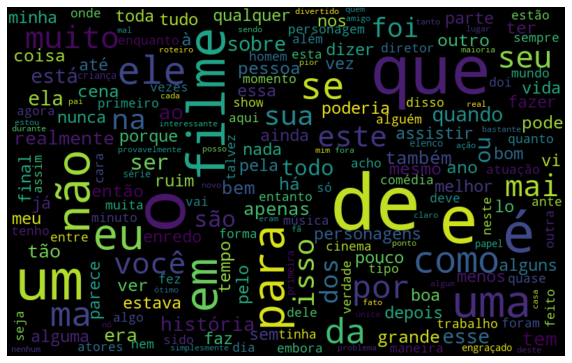

In [67]:
plt.figure(figsize=(10,8))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

In [70]:
#imdb.query("sentiment == 'pos'")

In [78]:
def nuvem_neg(texto,col):
    texto_neg = texto.query("sentiment == 'neg'")
    palavras = ''.join([texto for texto in texto_neg[col]])
    
    nuvem_palavras = WordCloud(width=800, 
                               height=500,
                               max_font_size=110,
                               collocations=False).generate(palavras)
    
    plt.figure(figsize=(10,8))
    plt.title("Nuvem palavras negativas")
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [80]:
def nuvem_pos(texto,col):
    texto_pos = texto.query("sentiment == 'pos'")
    palavras = ''.join([texto for texto in texto_pos[col]])
    
    nuvem_palavras = WordCloud(width=800, 
                               height=500,
                               max_font_size=110,
                               collocations=False).generate(palavras)
    
    plt.figure(figsize=(10,8))
    plt.title("Nuvem palavras positivas")
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

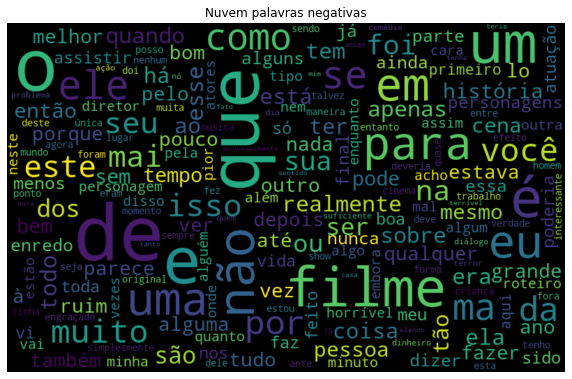

In [79]:
nuvem_neg(imdb,'text_pt')

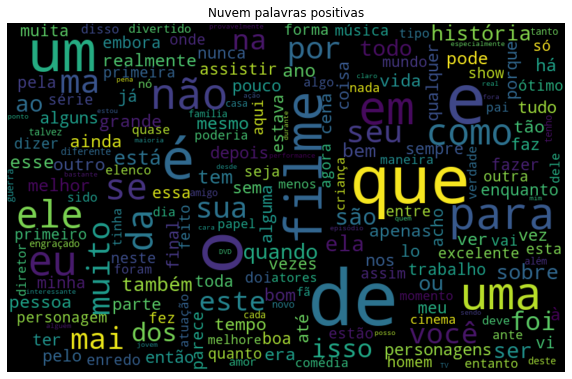

In [81]:
nuvem_pos(imdb,'text_pt')

## Calcular frequencia de palavras

In [114]:
def pareto(texto, col, qtd):
    
    palavras = ''.join([texto for texto in texto[col]])
    
    token = tokenize.WhitespaceTokenizer().tokenize(palavras)
    freq = nltk.FreqDist(token)
    
    df_freq = pd.DataFrame({"palavra": list(freq.keys()),
                        "frequencia":list(freq.values())})

    nlargest = df_freq.nlargest(columns = "frequencia",n=qtd)

    plt.figure(figsize=(12,8))
    sns.barplot(data=nlargest,x="palavra",y="frequencia", color = "green")
    plt.show()

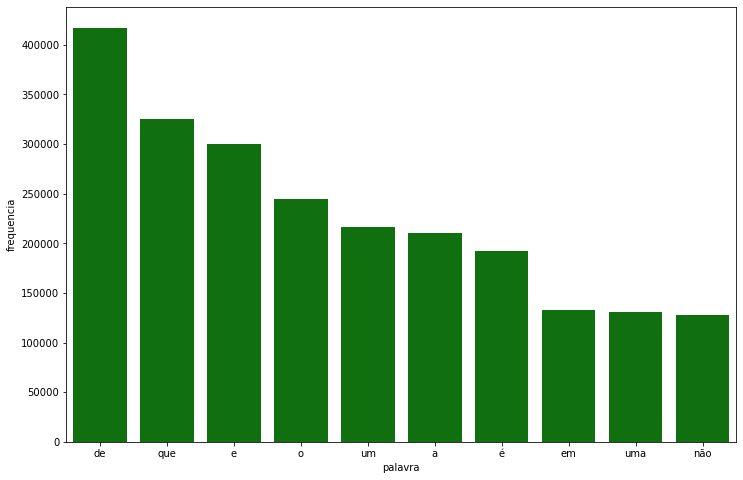

In [115]:
pareto(imdb, 'text_pt',10)

### Tratamento de palavras

In [122]:
def novas_frases(imdb):
    # palavras irrelevantes
    stopwords = nltk.corpus.stopwords.words("portuguese")
    
    frase_processada = list()
    for critica in imdb['text_pt']:
        nova_frase = list()
        palavras_texto = tokenize.WhitespaceTokenizer().tokenize(critica)
        for palavra in palavras_texto:
            if palavra not in stopwords:
                nova_frase.append(palavra)
        frase_processada.append(' '.join(nova_frase))
    imdb['resenha_trat1'] = frase_processada
    
    return imdb
    

In [123]:
imdb = novas_frases(imdb)

In [124]:
imdb.head()

,id,text_en,text_pt,sentiment,classe,resenha_trat1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [125]:
classificar_texto(imdb,'resenha_trat1','classe')

0.6640517589971694

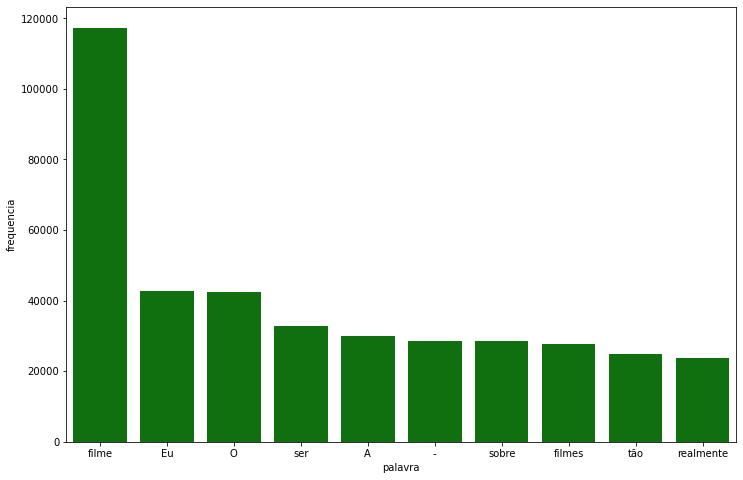

In [126]:
pareto(imdb,'resenha_trat1',10)